In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import log_loss
import os 
import plotly.express as px

pd.set_option('display.max_columns', None)

# from target_encoding import TargetEncoder

__Loading the data__

In [27]:
traindf=pd.read_csv('trainData.csv')
testdf=pd.read_csv('testData.csv')
print(traindf.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52099 entries, 0 to 52098
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Race_Time                  52099 non-null  object 
 1   Race_ID                    52099 non-null  int64  
 2   Course                     52099 non-null  object 
 3   Distance                   52099 non-null  object 
 4   distanceYards              52099 non-null  int64  
 5   Prize                      52099 non-null  int64  
 6   Going                      52099 non-null  object 
 7   Horse                      52099 non-null  object 
 8   Trainer                    52099 non-null  object 
 9   Jockey                     52099 non-null  object 
 10  betfairSP                  52099 non-null  float64
 11  Position                   52099 non-null  int64  
 12  timeSecs                   52099 non-null  float64
 13  pdsBeaten                  52099 non-null  flo

In [28]:
# number of rows and columns
print(traindf.shape)
print(testdf.shape)

(52099, 28)
(11275, 28)


In [29]:
traindf.head()

,Race_Time,Race_ID,Course,Distance,distanceYards,Prize,Going,Horse,Trainer,Jockey,betfairSP,Position,timeSecs,pdsBeaten,NMFP,Runners,Age,Speed_PreviousRun,Speed_2ndPreviousRun,NMFPLTO,MarketOdds_PreviousRun,MarketOdds_2ndPreviousRun,TrainerRating,JockeyRating,daysSinceLastRun,SireRating,DamsireRating,meanRunners
0,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Intervention,Michael Appleby,Aiden Brookes,1.62,2,73.750000,1.987874,0.666667,6,7,75.0,70.0,0.875000,11.03,3.60,2.377268,2.925027,7.0,2.933961,0.467149,10.25
1,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Evocative Spark,Darryll Holland,Christian Howarth,7.40,3,74.129997,2.442347,0.500000,6,5,62.0,48.0,0.181818,42.67,4.19,2.401274,2.611219,13.0,1.934009,0.459547,10.25
2,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Sluzewiec,Scott Dixon,Kieran O'Neill,69.12,5,74.940002,3.025291,0.166667,6,5,51.0,59.0,0.000000,141.13,86.83,2.824967,2.925073,50.0,2.411403,0.456616,8.00
3,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Muscika,David O'Meara,Mark Winn,7.72,6,75.019997,3.065258,0.000000,6,10,65.0,73.0,0.333333,8.97,12.86,2.317504,2.534689,38.0,2.639010,0.462397,10.00
4,02/01/2024 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Venturous,David Barron,David Probert,15.11,4,74.500000,2.753661,0.333333,6,11,59.0,62.0,0.090909,44.84,18.20,2.292027,2.448742,24.0,2.494198,0.450770,11.00


__Converting columns__

In [30]:
traindf['Race_Time']=pd.to_datetime(traindf['Race_Time'],dayfirst=True)
# testdf['Race_Time']=pd.to_datetime(testdf['Race_Time'])

In [31]:
traindf

,Race_Time,Race_ID,Course,Distance,distanceYards,Prize,Going,Horse,Trainer,Jockey,betfairSP,Position,timeSecs,pdsBeaten,NMFP,Runners,Age,Speed_PreviousRun,Speed_2ndPreviousRun,NMFPLTO,MarketOdds_PreviousRun,MarketOdds_2ndPreviousRun,TrainerRating,JockeyRating,daysSinceLastRun,SireRating,DamsireRating,meanRunners
0,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Intervention,Michael Appleby,Aiden Brookes,1.62,2,73.750000,1.987874,0.666667,6,7,75.0,70.0,0.875000,11.03,3.60,2.377268,2.925027,7.0,2.933961,0.467149,10.25
1,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Evocative Spark,Darryll Holland,Christian Howarth,7.40,3,74.129997,2.442347,0.500000,6,5,62.0,48.0,0.181818,42.67,4.19,2.401274,2.611219,13.0,1.934009,0.459547,10.25
2,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Sluzewiec,Scott Dixon,Kieran O'Neill,69.12,5,74.940002,3.025291,0.166667,6,5,51.0,59.0,0.000000,141.13,86.83,2.824967,2.925073,50.0,2.411403,0.456616,8.00
3,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Muscika,David O'Meara,Mark Winn,7.72,6,75.019997,3.065258,0.000000,6,10,65.0,73.0,0.333333,8.97,12.86,2.317504,2.534689,38.0,2.639010,0.462397,10.00
4,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Venturous,David Barron,David Probert,15.11,4,74.500000,2.753661,0.333333,6,11,59.0,62.0,0.090909,44.84,18.20,2.292027,2.448742,24.0,2.494198,0.450770,11.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52094,2024-12-31 15:22:00,56178,Lingfield,1m 4f,2640,4711,Standard,Fullforward,Michael Madgwick,William Carson,26.24,3,154.220001,1.998096,0.727273,11,4,56.0,43.0,0.833333,9.04,13.23,2.968319,2.767347,57.0,2.718093,0.480990,8.75
52095,2024-12-31 15:22:00,56178,Lingfield,1m 4f,2640,4711,Standard,Pablo Prince,Karen Jewell,Luke Morris,12.00,7,155.119995,2.547490,0.363636,11,6,45.0,55.0,0.500000,48.38,5.09,3.233067,2.457842,40.0,3.019927,0.449697,11.50
52096,2024-12-31 15:22:00,56178,Lingfield,1m 4f,2640,4711,Standard,Paradoxical,Jennie Candlish,George Wood,2.27,1,153.160004,0.000000,0.909091,11,3,71.0,58.0,0.800000,6.03,7.12,2.554826,2.555626,5.0,2.584142,0.450076,10.50
52097,2024-12-31 15:22:00,56178,Lingfield,1m 4f,2640,4711,Standard,Keen Interest,Alice Haynes,Kieran O'Neill,48.97,11,159.440002,3.654547,0.000000,11,3,53.0,51.0,0.400000,26.57,22.16,2.443137,2.917672,15.0,2.632082,0.456602,10.75


In [32]:
# low cardinality
traindf['Going'].unique() # 7 unique features

# high cardinality
traindf['Trainer'].unique() # more than 500
traindf['Jockey'].unique() # more than 1000
traindf['Course'].unique() # between 20 and 30 unique features


# we may further need to do label encoding for the columns with low cardinality

array(['Wolverhampton', 'Kempton', 'Lingfield', 'Newcastle', 'Southwell',
       'Chelmsford City', 'Dundalk', 'Curragh', 'Doncaster', 'Naas',
       'Cork', 'Pontefract', 'Catterick', 'Bath', 'Leopardstown',
       'Thirsk', 'Yarmouth', 'Windsor', 'Newmarket', 'Ripon', 'Newbury',
       'Brighton', 'Nottingham', 'Musselburgh', 'Epsom', 'Gowran Park',
       'Beverley', 'Sandown', 'Navan', 'Leicester', 'Haydock', 'Wetherby',
       'Ayr', 'Ascot', 'Redcar', 'Goodwood', 'Hamilton', 'Salisbury',
       'Sligo', 'Chester', 'Roscommon', 'Chepstow', 'Killarney', 'York',
       'Limerick', 'Carlisle', 'Tipperary', 'Fairyhouse', 'Down Royal',
       'Listowel', 'Ffos Las', 'Ballinrobe', 'Bellewstown', 'Galway',
       'Tramore', 'Clonmel', 'Laytown', 'Punchestown', 'Thurles'],
      dtype=object)

__Percent of missing values__

In [33]:
# finding % of missing values
feature_na=[feature for feature in traindf.columns if traindf[feature].isnull().sum()>1]
print(feature_na)

for feature in feature_na:
    
    print(feature,np.round(traindf[feature].isnull().mean(),4),'% of missing value')


['Speed_PreviousRun', 'Speed_2ndPreviousRun', 'NMFPLTO', 'MarketOdds_PreviousRun', 'MarketOdds_2ndPreviousRun', 'TrainerRating', 'JockeyRating', 'daysSinceLastRun', 'DamsireRating', 'meanRunners']
Speed_PreviousRun 0.0018 % of missing value
Speed_2ndPreviousRun 0.0039 % of missing value
NMFPLTO 0.0018 % of missing value
MarketOdds_PreviousRun 0.0018 % of missing value
MarketOdds_2ndPreviousRun 0.0039 % of missing value
TrainerRating 0.0007 % of missing value
JockeyRating 0.0027 % of missing value
daysSinceLastRun 0.0013 % of missing value
DamsireRating 0.0 % of missing value
meanRunners 0.0039 % of missing value


In [34]:
print(testdf.isnull().sum())
traindf.isnull().sum()

Race_Time                     0
Race_ID                       0
Course                        0
Distance                      0
distanceYards                 0
Prize                         0
Going                         0
Horse                         0
Trainer                       0
Jockey                        0
betfairSP                     0
Position                      0
timeSecs                      0
pdsBeaten                     0
NMFP                          0
Runners                       0
Age                           0
Speed_PreviousRun            16
Speed_2ndPreviousRun         30
NMFPLTO                      16
MarketOdds_PreviousRun       16
MarketOdds_2ndPreviousRun    30
TrainerRating                 9
JockeyRating                 22
daysSinceLastRun             13
SireRating                    1
DamsireRating                 0
meanRunners                  31
dtype: int64


Race_Time                      0
Race_ID                        0
Course                         0
Distance                       0
distanceYards                  0
Prize                          0
Going                          0
Horse                          0
Trainer                        0
Jockey                         0
betfairSP                      0
Position                       0
timeSecs                       0
pdsBeaten                      0
NMFP                           0
Runners                        0
Age                            0
Speed_PreviousRun             92
Speed_2ndPreviousRun         202
NMFPLTO                       92
MarketOdds_PreviousRun        92
MarketOdds_2ndPreviousRun    202
TrainerRating                 38
JockeyRating                 143
daysSinceLastRun              66
SireRating                     1
DamsireRating                  2
meanRunners                  203
dtype: int64

__Correlation__

__Target Distribution__

In [35]:
# if the position is 1, then its a winner
traindf['Win']=(traindf['Position']==1).astype(int)

traindf['Win'].mean()
traindf.head(3)

,Race_Time,Race_ID,Course,Distance,distanceYards,Prize,Going,Horse,Trainer,Jockey,betfairSP,Position,timeSecs,pdsBeaten,NMFP,Runners,Age,Speed_PreviousRun,Speed_2ndPreviousRun,NMFPLTO,MarketOdds_PreviousRun,MarketOdds_2ndPreviousRun,TrainerRating,JockeyRating,daysSinceLastRun,SireRating,DamsireRating,meanRunners,Win
0,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Intervention,Michael Appleby,Aiden Brookes,1.62,2,73.750000,1.987874,0.666667,6,7,75.0,70.0,0.875000,11.03,3.60,2.377268,2.925027,7.0,2.933961,0.467149,10.25,0
1,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Evocative Spark,Darryll Holland,Christian Howarth,7.40,3,74.129997,2.442347,0.500000,6,5,62.0,48.0,0.181818,42.67,4.19,2.401274,2.611219,13.0,1.934009,0.459547,10.25,0
2,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Sluzewiec,Scott Dixon,Kieran O'Neill,69.12,5,74.940002,3.025291,0.166667,6,5,51.0,59.0,0.000000,141.13,86.83,2.824967,2.925073,50.0,2.411403,0.456616,8.00,0


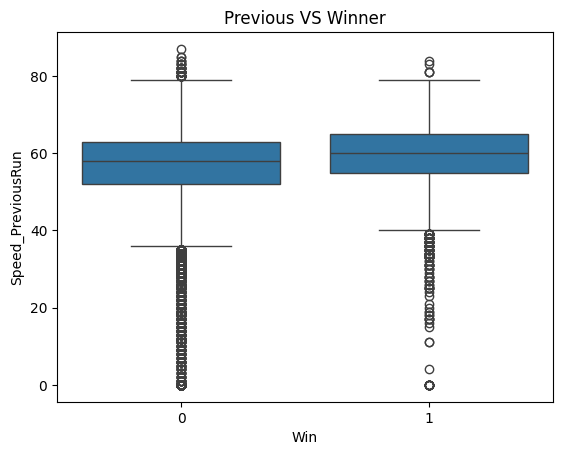

In [36]:
sns.boxplot(data=traindf,x='Win',y='Speed_PreviousRun')
plt.title("Previous VS Winner")
plt.show()

In [37]:
traindf

,Race_Time,Race_ID,Course,Distance,distanceYards,Prize,Going,Horse,Trainer,Jockey,betfairSP,Position,timeSecs,pdsBeaten,NMFP,Runners,Age,Speed_PreviousRun,Speed_2ndPreviousRun,NMFPLTO,MarketOdds_PreviousRun,MarketOdds_2ndPreviousRun,TrainerRating,JockeyRating,daysSinceLastRun,SireRating,DamsireRating,meanRunners,Win
0,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Intervention,Michael Appleby,Aiden Brookes,1.62,2,73.750000,1.987874,0.666667,6,7,75.0,70.0,0.875000,11.03,3.60,2.377268,2.925027,7.0,2.933961,0.467149,10.25,0
1,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Evocative Spark,Darryll Holland,Christian Howarth,7.40,3,74.129997,2.442347,0.500000,6,5,62.0,48.0,0.181818,42.67,4.19,2.401274,2.611219,13.0,1.934009,0.459547,10.25,0
2,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Sluzewiec,Scott Dixon,Kieran O'Neill,69.12,5,74.940002,3.025291,0.166667,6,5,51.0,59.0,0.000000,141.13,86.83,2.824967,2.925073,50.0,2.411403,0.456616,8.00,0
3,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Muscika,David O'Meara,Mark Winn,7.72,6,75.019997,3.065258,0.000000,6,10,65.0,73.0,0.333333,8.97,12.86,2.317504,2.534689,38.0,2.639010,0.462397,10.00,0
4,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Venturous,David Barron,David Probert,15.11,4,74.500000,2.753661,0.333333,6,11,59.0,62.0,0.090909,44.84,18.20,2.292027,2.448742,24.0,2.494198,0.450770,11.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52094,2024-12-31 15:22:00,56178,Lingfield,1m 4f,2640,4711,Standard,Fullforward,Michael Madgwick,William Carson,26.24,3,154.220001,1.998096,0.727273,11,4,56.0,43.0,0.833333,9.04,13.23,2.968319,2.767347,57.0,2.718093,0.480990,8.75,0
52095,2024-12-31 15:22:00,56178,Lingfield,1m 4f,2640,4711,Standard,Pablo Prince,Karen Jewell,Luke Morris,12.00,7,155.119995,2.547490,0.363636,11,6,45.0,55.0,0.500000,48.38,5.09,3.233067,2.457842,40.0,3.019927,0.449697,11.50,0
52096,2024-12-31 15:22:00,56178,Lingfield,1m 4f,2640,4711,Standard,Paradoxical,Jennie Candlish,George Wood,2.27,1,153.160004,0.000000,0.909091,11,3,71.0,58.0,0.800000,6.03,7.12,2.554826,2.555626,5.0,2.584142,0.450076,10.50,1
52097,2024-12-31 15:22:00,56178,Lingfield,1m 4f,2640,4711,Standard,Keen Interest,Alice Haynes,Kieran O'Neill,48.97,11,159.440002,3.654547,0.000000,11,3,53.0,51.0,0.400000,26.57,22.16,2.443137,2.917672,15.0,2.632082,0.456602,10.75,0


__Skewness of the graph__

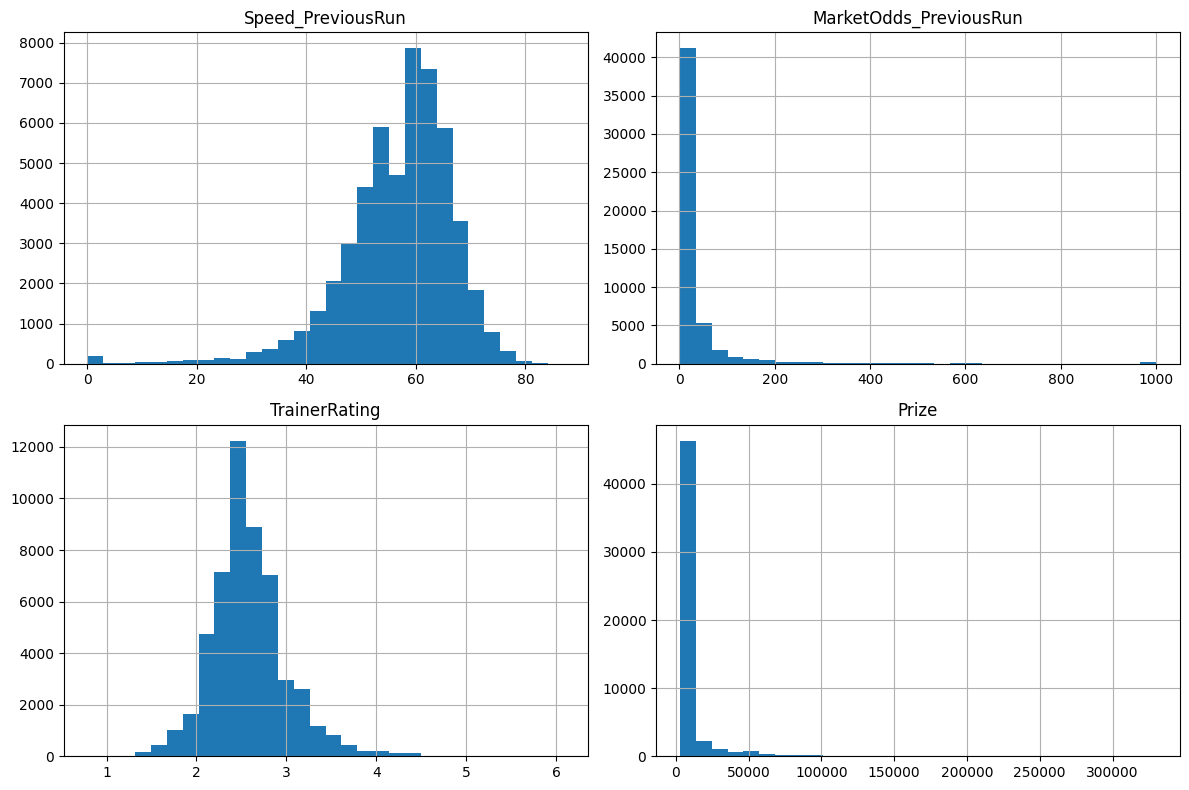

In [38]:
numeric_cols = ['Speed_PreviousRun', 'MarketOdds_PreviousRun', 'TrainerRating', 'Prize']
traindf[numeric_cols].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()


In [39]:
traindf['MarketOdds_PreviousRun'].skew()  # > 0 means right-skewed
traindf['Prize'].skew()

traindf['log_MarketOdds_PreviousRun'] = np.log1p(traindf['MarketOdds_PreviousRun'])
testdf['log_MarketOdds_PreviousRun'] = np.log1p(testdf['MarketOdds_PreviousRun'])



In [40]:
traindf.head(5)

,Race_Time,Race_ID,Course,Distance,distanceYards,Prize,Going,Horse,Trainer,Jockey,betfairSP,Position,timeSecs,pdsBeaten,NMFP,Runners,Age,Speed_PreviousRun,Speed_2ndPreviousRun,NMFPLTO,MarketOdds_PreviousRun,MarketOdds_2ndPreviousRun,TrainerRating,JockeyRating,daysSinceLastRun,SireRating,DamsireRating,meanRunners,Win,log_MarketOdds_PreviousRun
0,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Intervention,Michael Appleby,Aiden Brookes,1.62,2,73.750000,1.987874,0.666667,6,7,75.0,70.0,0.875000,11.03,3.60,2.377268,2.925027,7.0,2.933961,0.467149,10.25,0,2.487404
1,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Evocative Spark,Darryll Holland,Christian Howarth,7.40,3,74.129997,2.442347,0.500000,6,5,62.0,48.0,0.181818,42.67,4.19,2.401274,2.611219,13.0,1.934009,0.459547,10.25,0,3.776661
2,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Sluzewiec,Scott Dixon,Kieran O'Neill,69.12,5,74.940002,3.025291,0.166667,6,5,51.0,59.0,0.000000,141.13,86.83,2.824967,2.925073,50.0,2.411403,0.456616,8.00,0,4.956742
3,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Muscika,David O'Meara,Mark Winn,7.72,6,75.019997,3.065258,0.000000,6,10,65.0,73.0,0.333333,8.97,12.86,2.317504,2.534689,38.0,2.639010,0.462397,10.00,0,2.299581
4,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Venturous,David Barron,David Probert,15.11,4,74.500000,2.753661,0.333333,6,11,59.0,62.0,0.090909,44.84,18.20,2.292027,2.448742,24.0,2.494198,0.450770,11.00,0,3.825157


__Average speed run from previous and 2nd previous run__

In [41]:
traindf['AvgSpeed']=(traindf['Speed_PreviousRun'] + traindf['Speed_2ndPreviousRun']) / 2

__Correlation Heatmap__

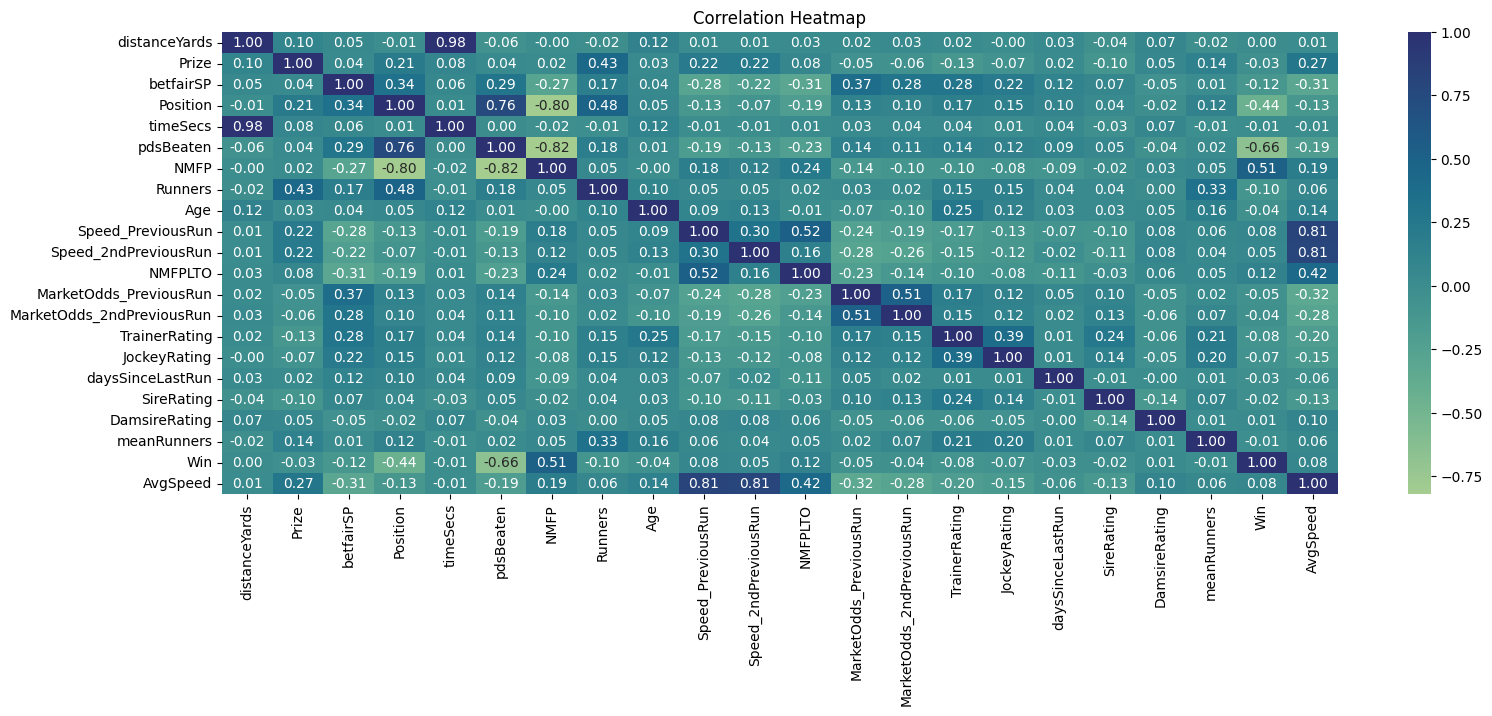

In [42]:
import seaborn as sns


# eliminating non numerical columns
nonnumeric_cols=['Race_ID','Course','Distance','Going','Horse','Trainer','Jockey','log_MarketOdds_PreviousRun']
numerdf=traindf.drop(columns=nonnumeric_cols)

filteredf=numerdf.select_dtypes(include='number')
corr=filteredf.corr()

plt.figure(figsize=(18,6))
sns.heatmap(corr, annot=True, fmt='.2f',cmap='crest')
plt.title('Correlation Heatmap')
plt.show()



__Distrbutions of Horses Per Race__

Text(0.5, 1.0, 'Distribution of Field Sizes (Horses per Race)')

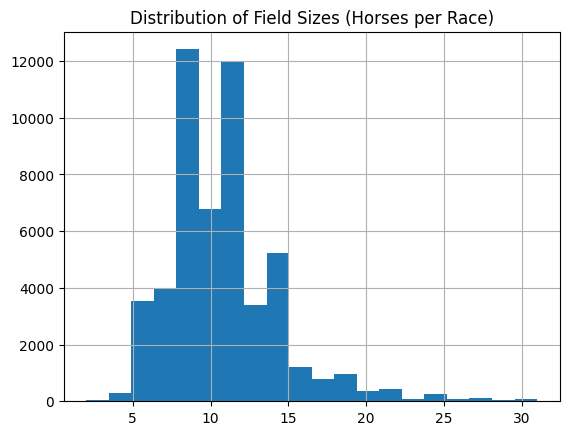

In [43]:
traindf['Runners'].hist(bins=20)
plt.title("Distribution of Field Sizes (Horses per Race)")


In [44]:
traindf.head(2)

,Race_Time,Race_ID,Course,Distance,distanceYards,Prize,Going,Horse,Trainer,Jockey,betfairSP,Position,timeSecs,pdsBeaten,NMFP,Runners,Age,Speed_PreviousRun,Speed_2ndPreviousRun,NMFPLTO,MarketOdds_PreviousRun,MarketOdds_2ndPreviousRun,TrainerRating,JockeyRating,daysSinceLastRun,SireRating,DamsireRating,meanRunners,Win,log_MarketOdds_PreviousRun,AvgSpeed
0,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Intervention,Michael Appleby,Aiden Brookes,1.62,2,73.750000,1.987874,0.666667,6,7,75.0,70.0,0.875000,11.03,3.60,2.377268,2.925027,7.0,2.933961,0.467149,10.25,0,2.487404,72.5
1,2024-01-02 19:00:00,1935,Wolverhampton,6f 20y,1340,4972,Standard,Evocative Spark,Darryll Holland,Christian Howarth,7.40,3,74.129997,2.442347,0.500000,6,5,62.0,48.0,0.181818,42.67,4.19,2.401274,2.611219,13.0,1.934009,0.459547,10.25,0,3.776661,55.0


__Winners Data Exploration__

C:\Users\sanja\AppData\Local\Temp\ipykernel_14748\797173855.py:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




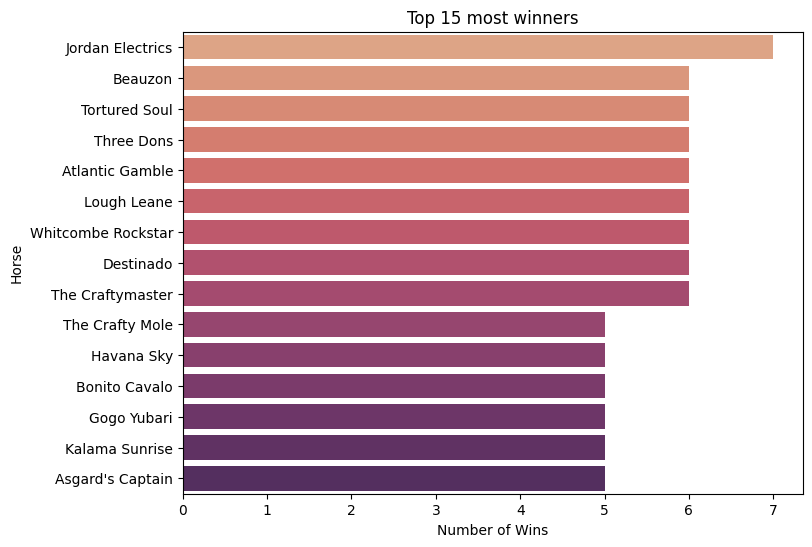

In [45]:
winners=traindf[traindf['Win']==1]

horsecnt=winners['Horse'].value_counts().head(15)

plt.figure(figsize=(8,6))
sns.barplot(x=horsecnt.values,y=horsecnt.index,palette='flare')
plt.xlabel('Number of Wins')
plt.ylabel('Horse')
plt.title('Top 15 most winners')
plt.show()


__Age Group of most winner__

In [46]:
# plt.figure(figsize=(8,6))
# sns.countplot(x='Age',data=winners,palette='flare')
# plt.xlabel('Age brackets of horses with most wins')
# plt.ylabel('Horse')
# plt.title('Count of Wins')
# plt.show()

fig=px.histogram(winners, x='Age', title='Winners falling in Age Bracker',color='Age')
fig.update_layout(xaxis_title='Age brackets of horses with most wins', yaxis_title='Count of Wins', bargap=0.2
)


In [47]:
# plt.figure(figsize=(10, 6))
# sns.boxplot(x='Age', y='distanceYards', data=winners, palette='coolwarm')
# plt.title('Race Distance by Horse Age (Winners Only)')
# plt.xlabel('Horse Age')
# plt.ylabel('Race Distance (Yards)')
# plt.tight_layout()
# plt.show()

fig = px.box(
    winners, x='Age', y='distanceYards', 
    color='Age',
    title='Race Distance by Horse Age (Winners Only)'
)

fig.update_layout(
    xaxis_title='Horse Age',
    yaxis_title='Race Distance (Yards)',
    showlegend=False,  # Optional: if you don't want a legend
)

fig.show()


In [48]:
# saving the modified dataframe as csv
outputdir='./data'
if not os.path.exists(outputdir):
    os.mkdir(outputdir)

dir=os.path.join(outputdir,'train.csv')
traindf.to_csv(dir,index=False)